<a href="https://colab.research.google.com/github/feraranas/Cornell-CS-5787-Applied-Machine-Learning/blob/main/AppliedML_Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED LEARNING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
data = load_diabetes()

# Understanding the dataset through DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
# display(df)

# Loading 
diabetes_X, diabetes_y = load_diabetes(return_X_y = True, as_frame = True)

# Use only the BMI feature(column)
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis = 1).head()


In [ ]:
# Visualizing this two - dimensional dataset
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train, color = 'black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

In [ ]:
# Example of a Linear function between two vars
theta_list = [(1, 2), (2, 1)]
for theta0, theta1 in theta_list:
  x = np.arange(10)
  y = theta1 * x + theta0
  plt.plot(x,y)

In [ ]:
# The goal is to find a good set of parameters
# consistent with the data provided.
# For this we use Linear Regression.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): ', regr.coef_[0])
print('Intercept (theta1): ', regr.intercept_)


In [ ]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train, color = 'black')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color = 'black', linewidth = 2)


In [ ]:
# Loading three new patients to be predicted
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

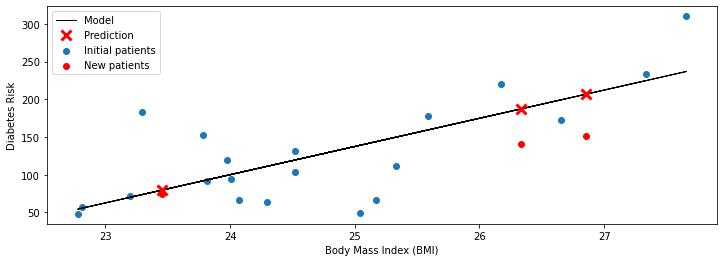

In [18]:
# Generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# Visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color = 'red', marker = 'o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color = 'black', linewidth = 1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color = 'red', mew = 3, markersize = 10)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])